Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel('life_issurance.xlsx')
df

,age,inssurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


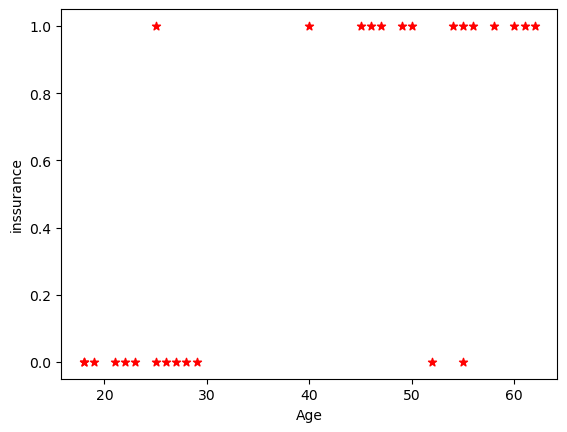

In [4]:
plt.scatter(df['age'],df['inssurance'],color='red',marker='*')
plt.xlabel('Age')
plt.ylabel('inssurance')
plt.show()

In [5]:
X=df.drop(['inssurance'],axis='columns')
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [6]:
Y=df.inssurance
Y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: inssurance, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [8]:
print("length of x_train = ",len(x_train))
print("length of y_train = ",len(y_train))
print("length of x_test = ",len(x_test))
print("length of y_test = ",len(y_test))

length of x_train =  20
length of y_train =  20
length of x_test =  7
length of y_test =  7


In [9]:
print("shape of x_train = ",x_train.shape)
print("shape of y_train = ",y_train.shape)
print("shape of x_test = ",x_test.shape)
print("shape of y_test = ",y_test.shape)

shape of x_train =  (20, 1)
shape of y_train =  (20,)
shape of x_test =  (7, 1)
shape of y_test =  (7,)


In [10]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [11]:
log.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [12]:
log.score(x_test,y_test)

1.0

In [13]:
log.predict_proba(x_test)

array([[0.38238449, 0.61761551],
       [0.30908506, 0.69091494],
       [0.33268192, 0.66731808],
       [0.15829595, 0.84170405],
       [0.18933736, 0.81066264],
       [0.82901252, 0.17098748],
       [0.43467577, 0.56532423]])

Now model save in Pickle model

In [14]:
import pickle
with open('Logistic_model','wb') as f:
    pickle.dump('log',f)


In [15]:
with open('Logistic_model','rb') as f:
    lm=pickle.load(f)

In [21]:
log.predict([[25]])

d:\microsoft download\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [22]:
log.predict([[70]])

d:\microsoft download\anacoda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

log.coef_ indicates value of m in y=m*x + c equation

In [23]:
log.coef_

array([[0.10832023]])

log.intercept_ indicates value of c in y=m*x + c equation

In [25]:
log.intercept_

array([-4.61161145])

Lets defined sigmoid function now and do the numpy with hand

In [26]:
def sigmiod_func(x):
    return 1/1+np.exp(-x)

Lets defined prediction function now and do  with hand

In [30]:
def prediction_function(age):
    y_predict=0.11 * age + -4.61 #mx+c
    y=sigmiod_func(y_predict)
    return y

In [35]:
prediction_function(25)

7.710045286052926

1.0 is greater than 0.5 which means person with 75 age will buy insurance

In [34]:
age = 43
prediction_function(age)

1.9548906573289127

1.95 is more than 0.5 which means person with 43 will buy the insurance

Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model